In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')
from matplotlib.colors import ListedColormap

In [354]:
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_predict,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,cohen_kappa_score,\
roc_auc_score,roc_curve,precision_score

from sklearn.feature_selection import RFE

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier


from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [355]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

In [356]:
df_healthcare = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_healthcare.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [357]:
df_healthcare.shape

(5110, 12)

In [358]:
# There is 5110 and 10 columns

In [359]:
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [360]:
df_healthcare.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [361]:
df_healthcare.isna().mean()

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [362]:
# There is null value present present for bmi

In [363]:
df_healthcare[df_healthcare.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [364]:
# There is no duplicate values

In [365]:
df_healthcare.drop(['id'],axis=1,inplace=True)

In [366]:
df_healthcare.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [367]:
knn_imputer = KNNImputer(n_neighbors=2)
fitted = knn_imputer.fit_transform(df_healthcare[['bmi']])
df_healthcare['bmi'] = fitted

In [368]:
# checking the unique value for categorical columns
# gender
df_healthcare['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [369]:
df_healthcare['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [370]:
df_healthcare['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [371]:
df_healthcare['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [372]:
df_healthcare['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [373]:
df_healthcare['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [374]:
df_healthcare['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [375]:
df_healthcare['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [376]:
df_healthcare.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [377]:
df_healthcare.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.076716
stroke               4.193284
dtype: float64

In [378]:
# none of column is normally distributted.

In [379]:
df_healthcare.kurt()

age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
avg_glucose_level     1.680479
bmi                   3.623061
stroke               15.589736
dtype: float64

# visualization

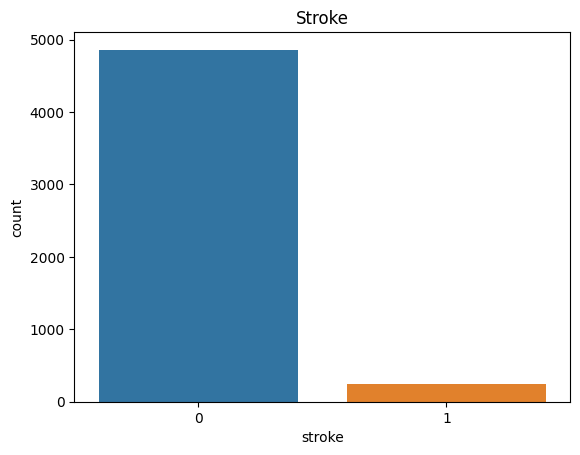

In [380]:
sns.countplot(data=df_healthcare,x='stroke')
plt.title('Stroke');

In [381]:
# We can see that there is huge imbalance for target column

In [382]:
# spliting numerical data and categorical data

df_healthcare_cat = df_healthcare.select_dtypes(include=np.object_)
df_healthcare_num = df_healthcare.select_dtypes(exclude=np.object_)

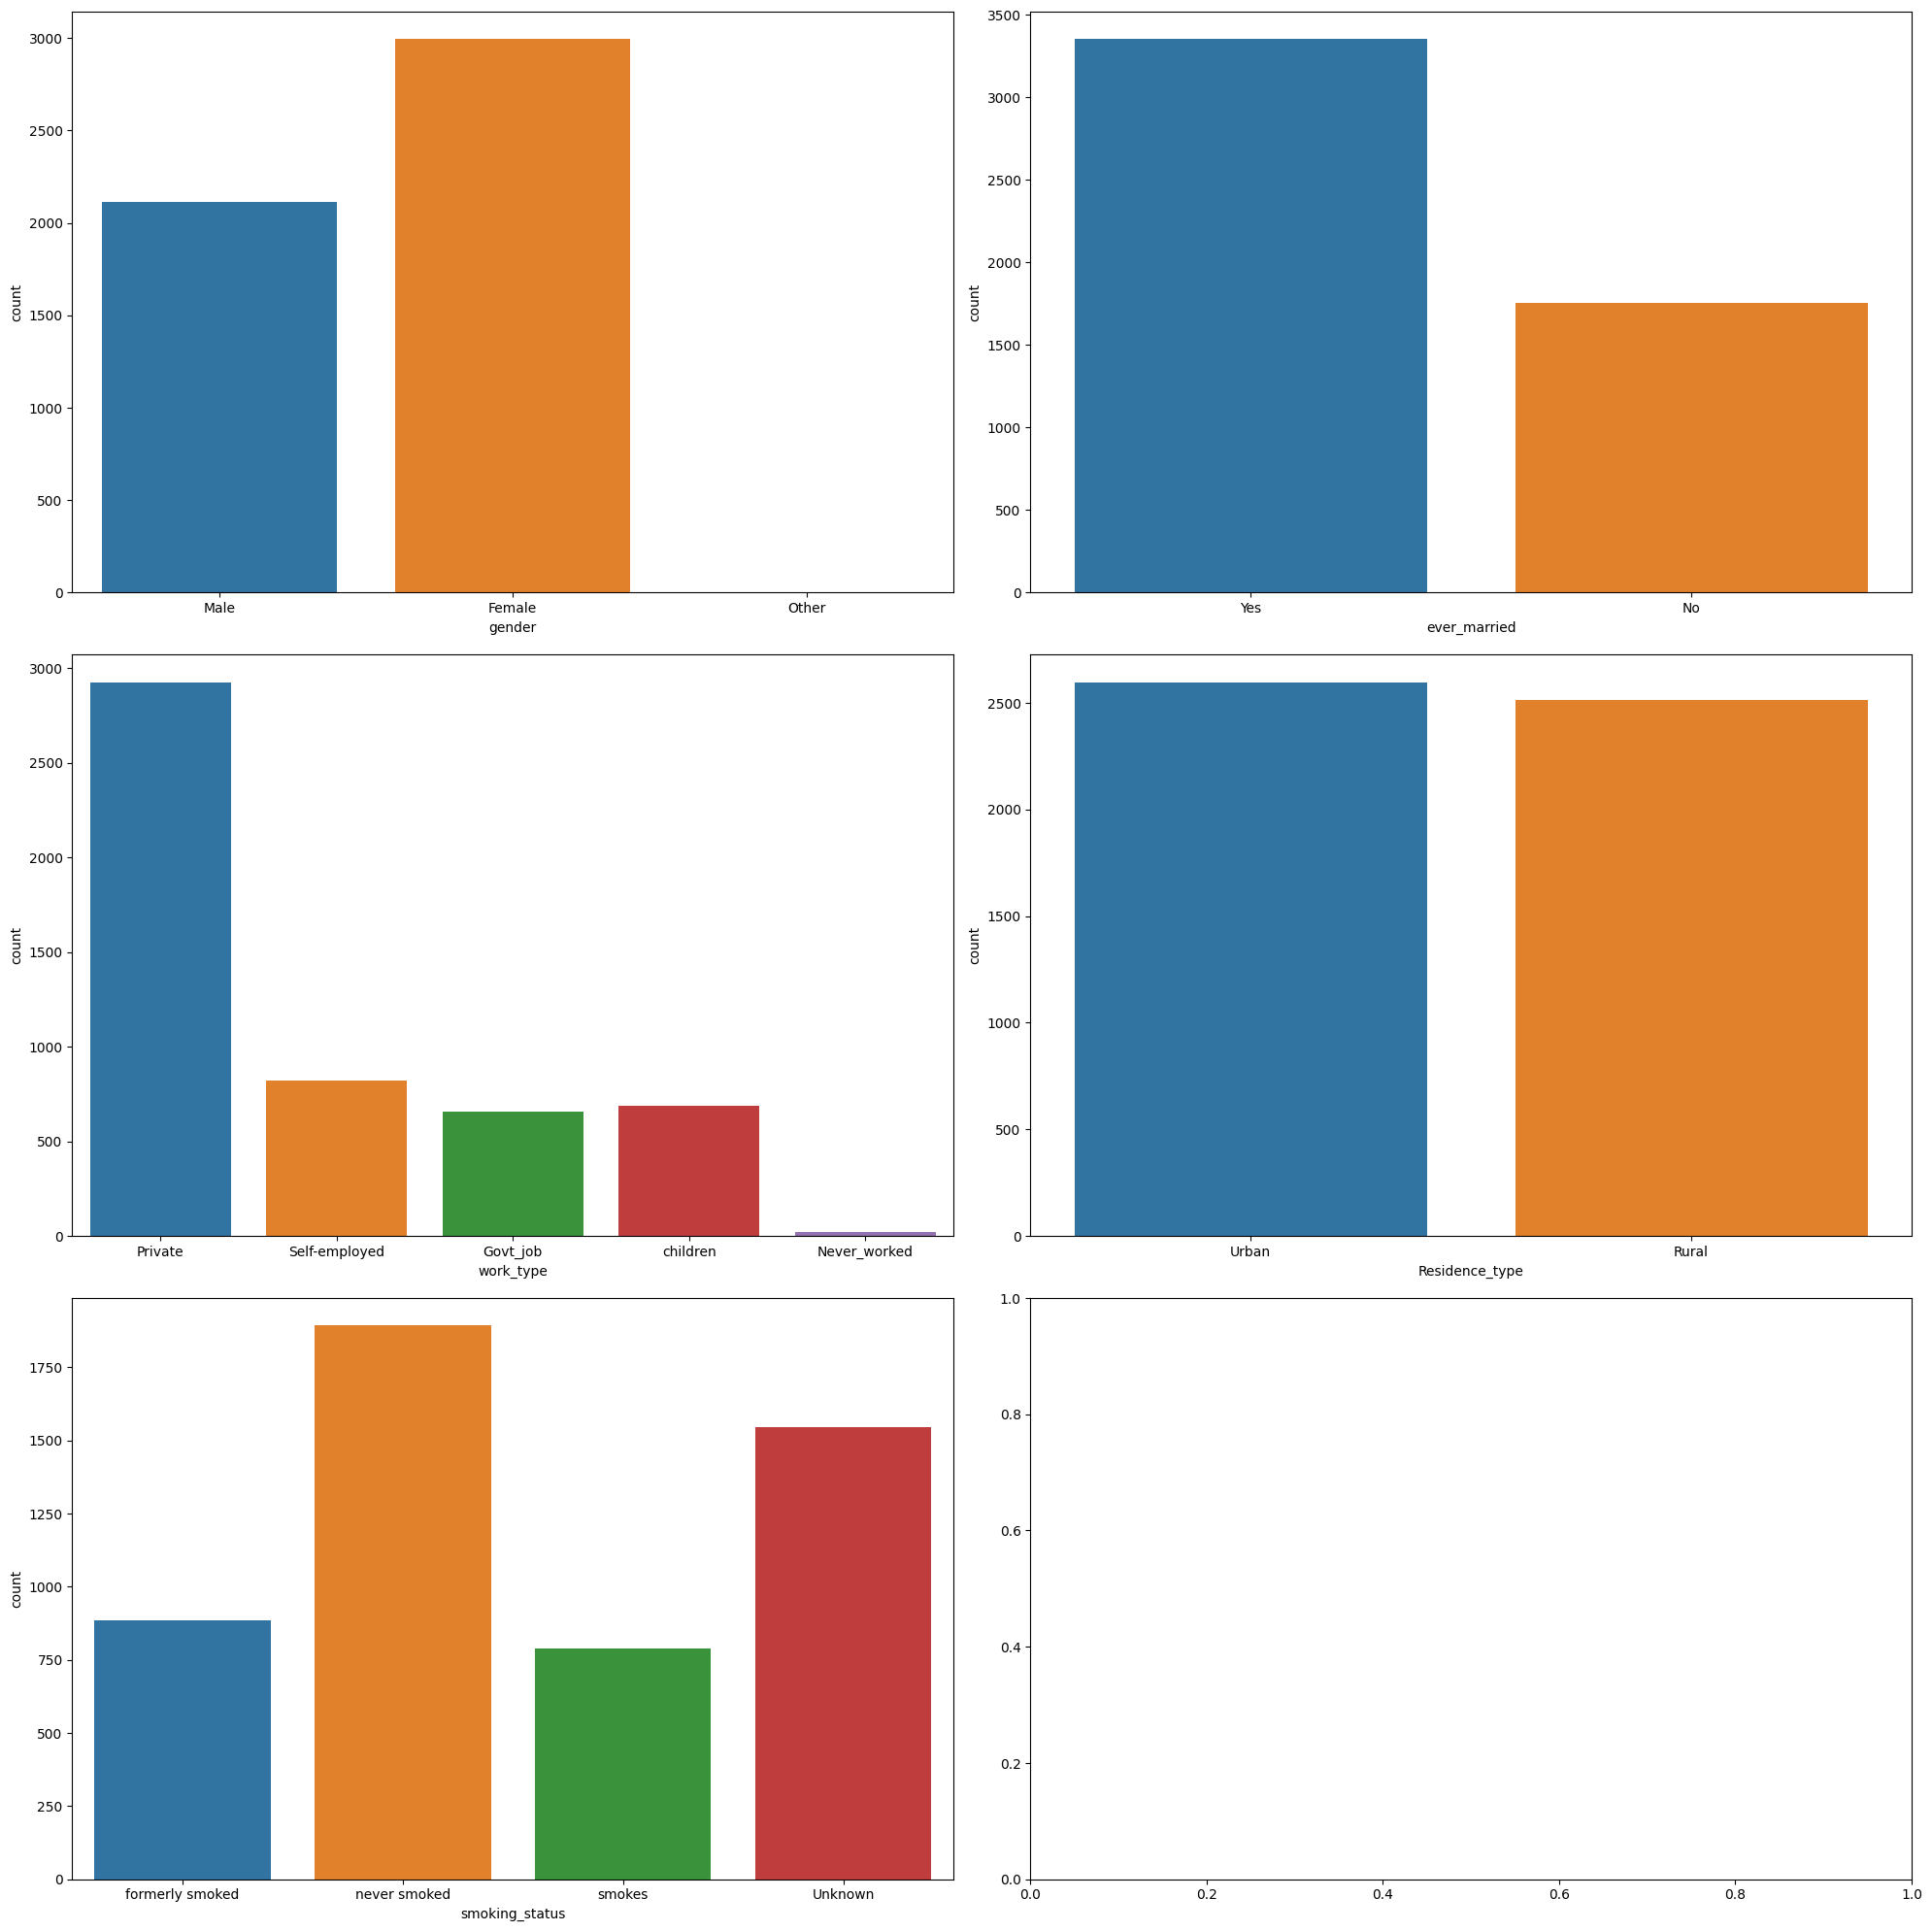

In [383]:
# For categorical columns
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
for x,y in zip(df_healthcare_cat.columns,ax.flatten()):
    sns.countplot(x=df_healthcare_cat[x],ax=y)
    
plt.tight_layout()
plt.show()

In [384]:
# Other categorical are fairly balanced except gender and work_type
df_healthcare_cat['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [385]:
df_healthcare_cat['work_type'].replace({'Never_worked':'children'},inplace=True)
# Replacing 'Never_worked' value in work_type column to 'children' 
# since children normally don't work.

In [386]:
df_healthcare_cat['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [387]:
df_healthcare_cat['gender'].replace({'Other':'Female'},inplace=True)
# Replacing other value in gender column to female since there is more number of female records in the gender column

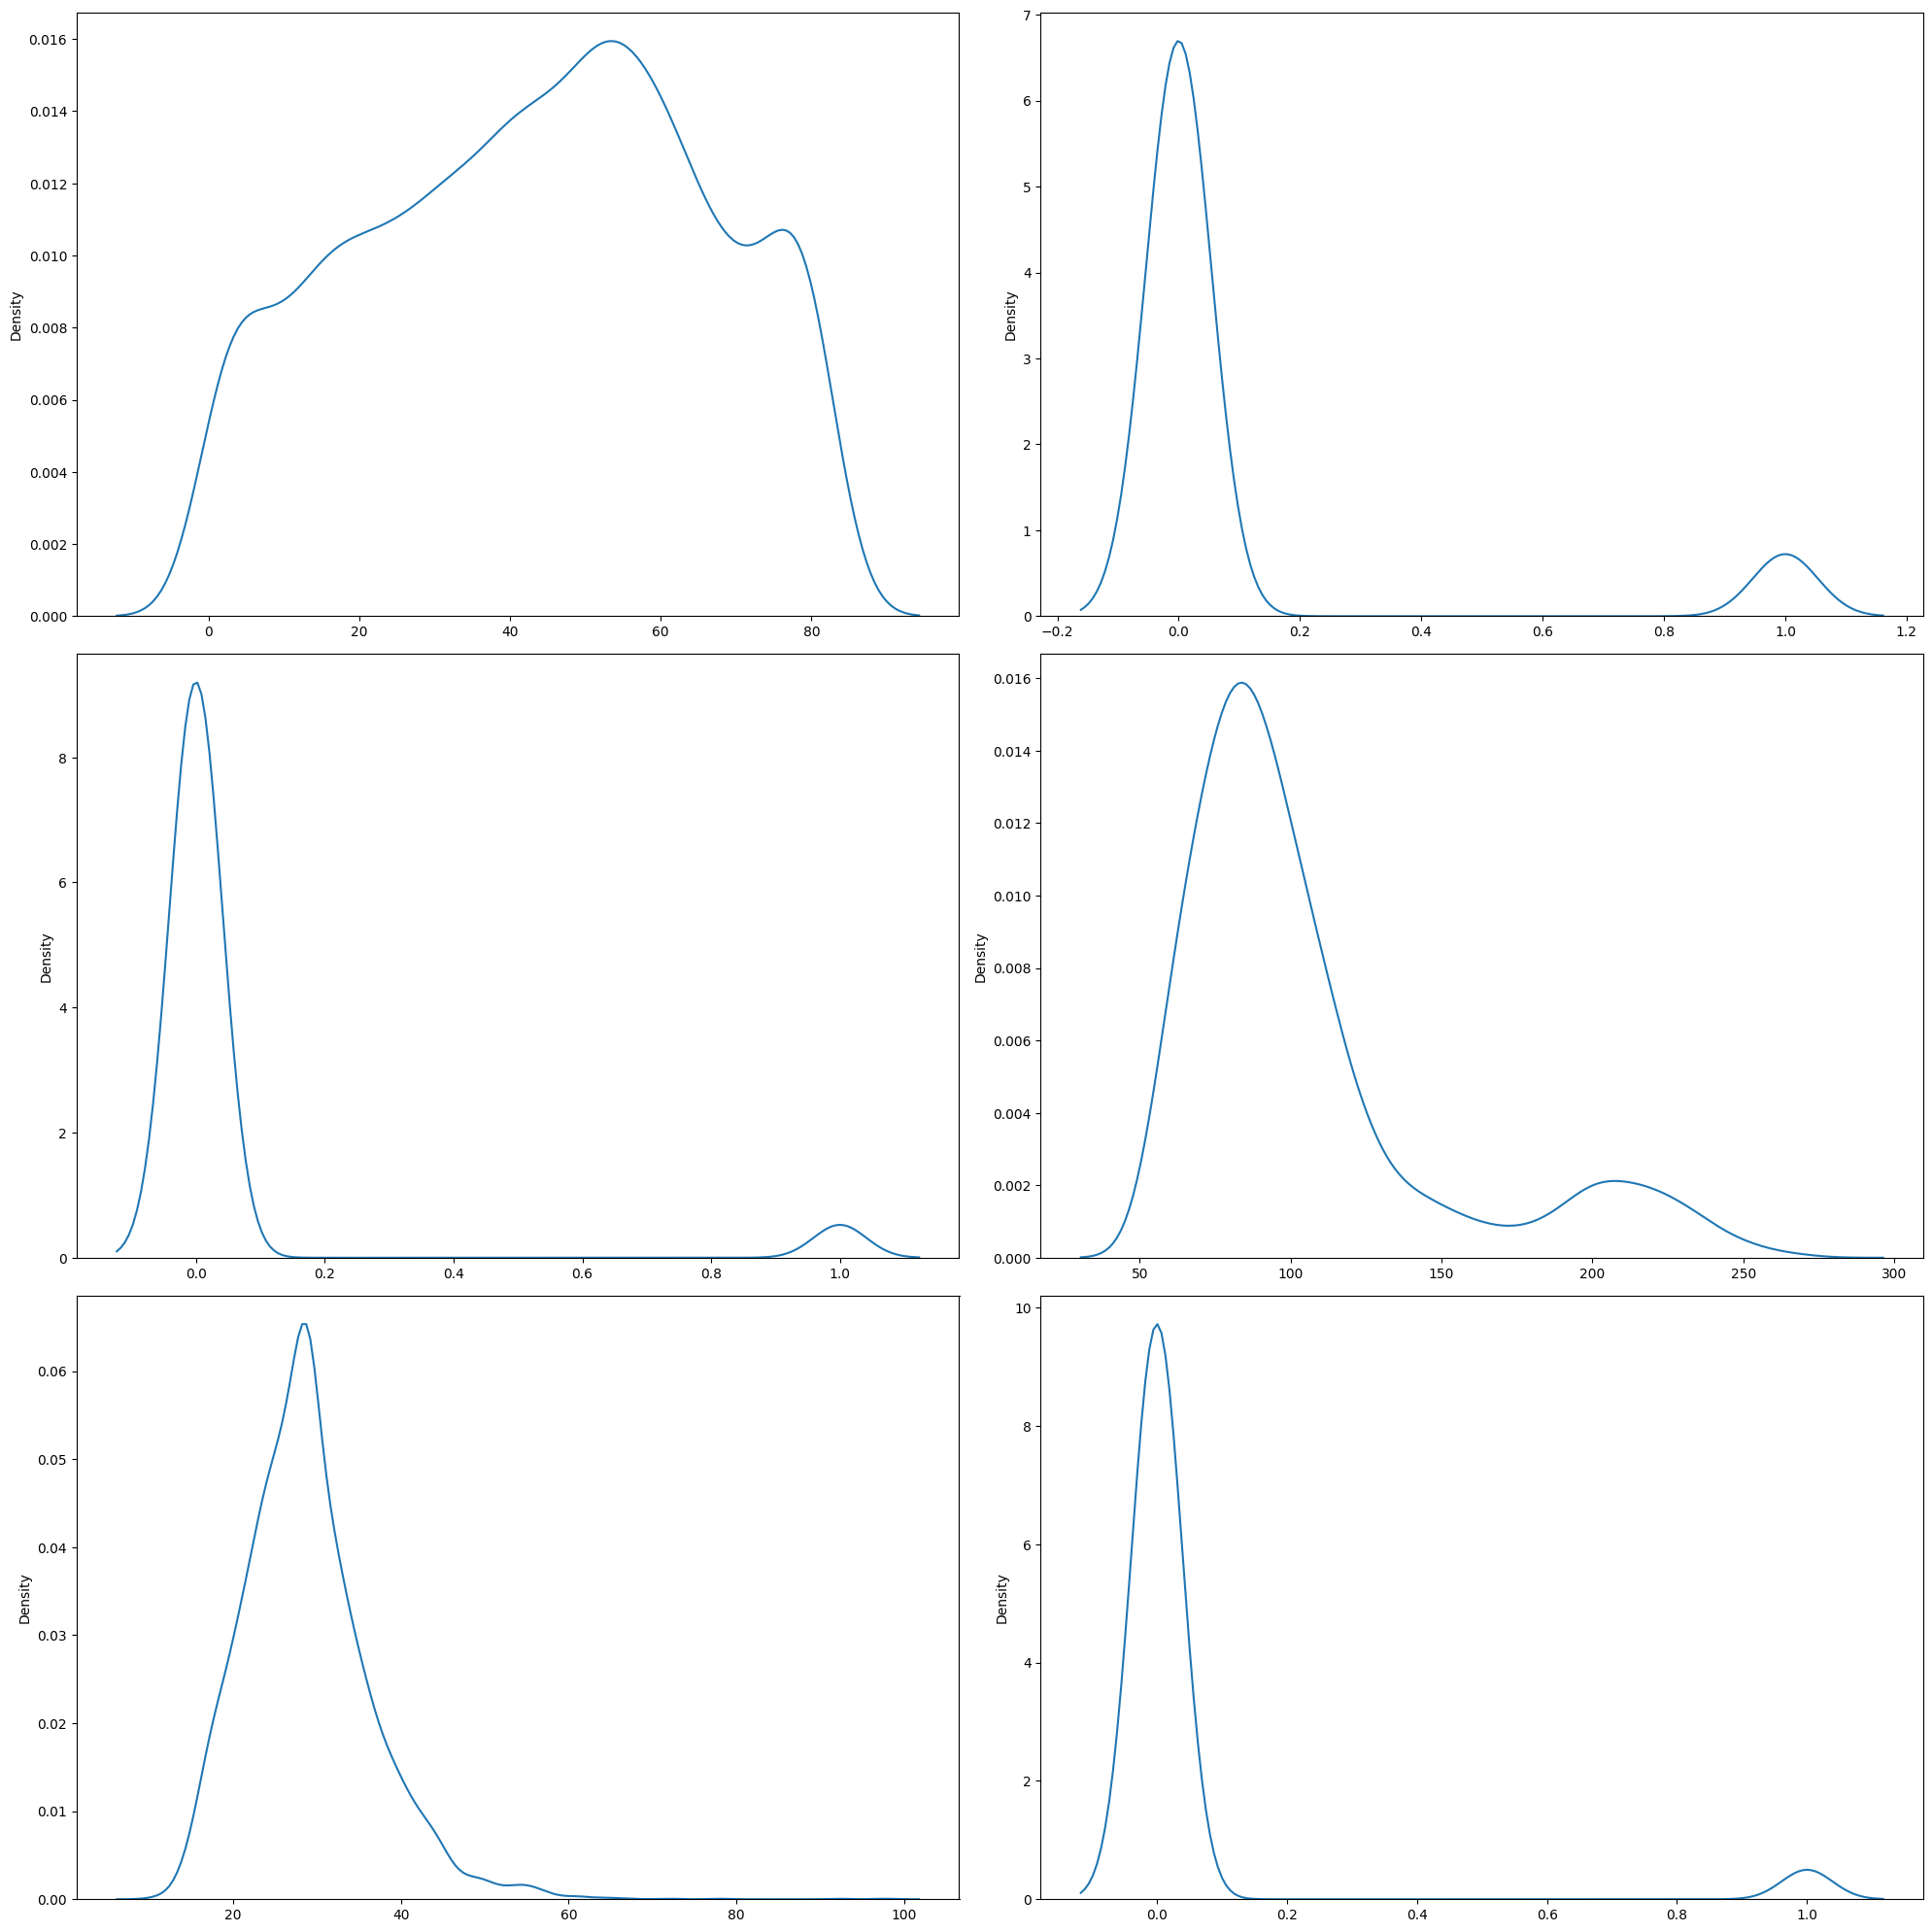

In [388]:
# For numerical columns
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
for x,y in zip(df_healthcare_num.columns,ax.flatten()):
    sns.distplot(x=df_healthcare_num[x],ax=y,hist=False)
    
plt.tight_layout()
plt.show()

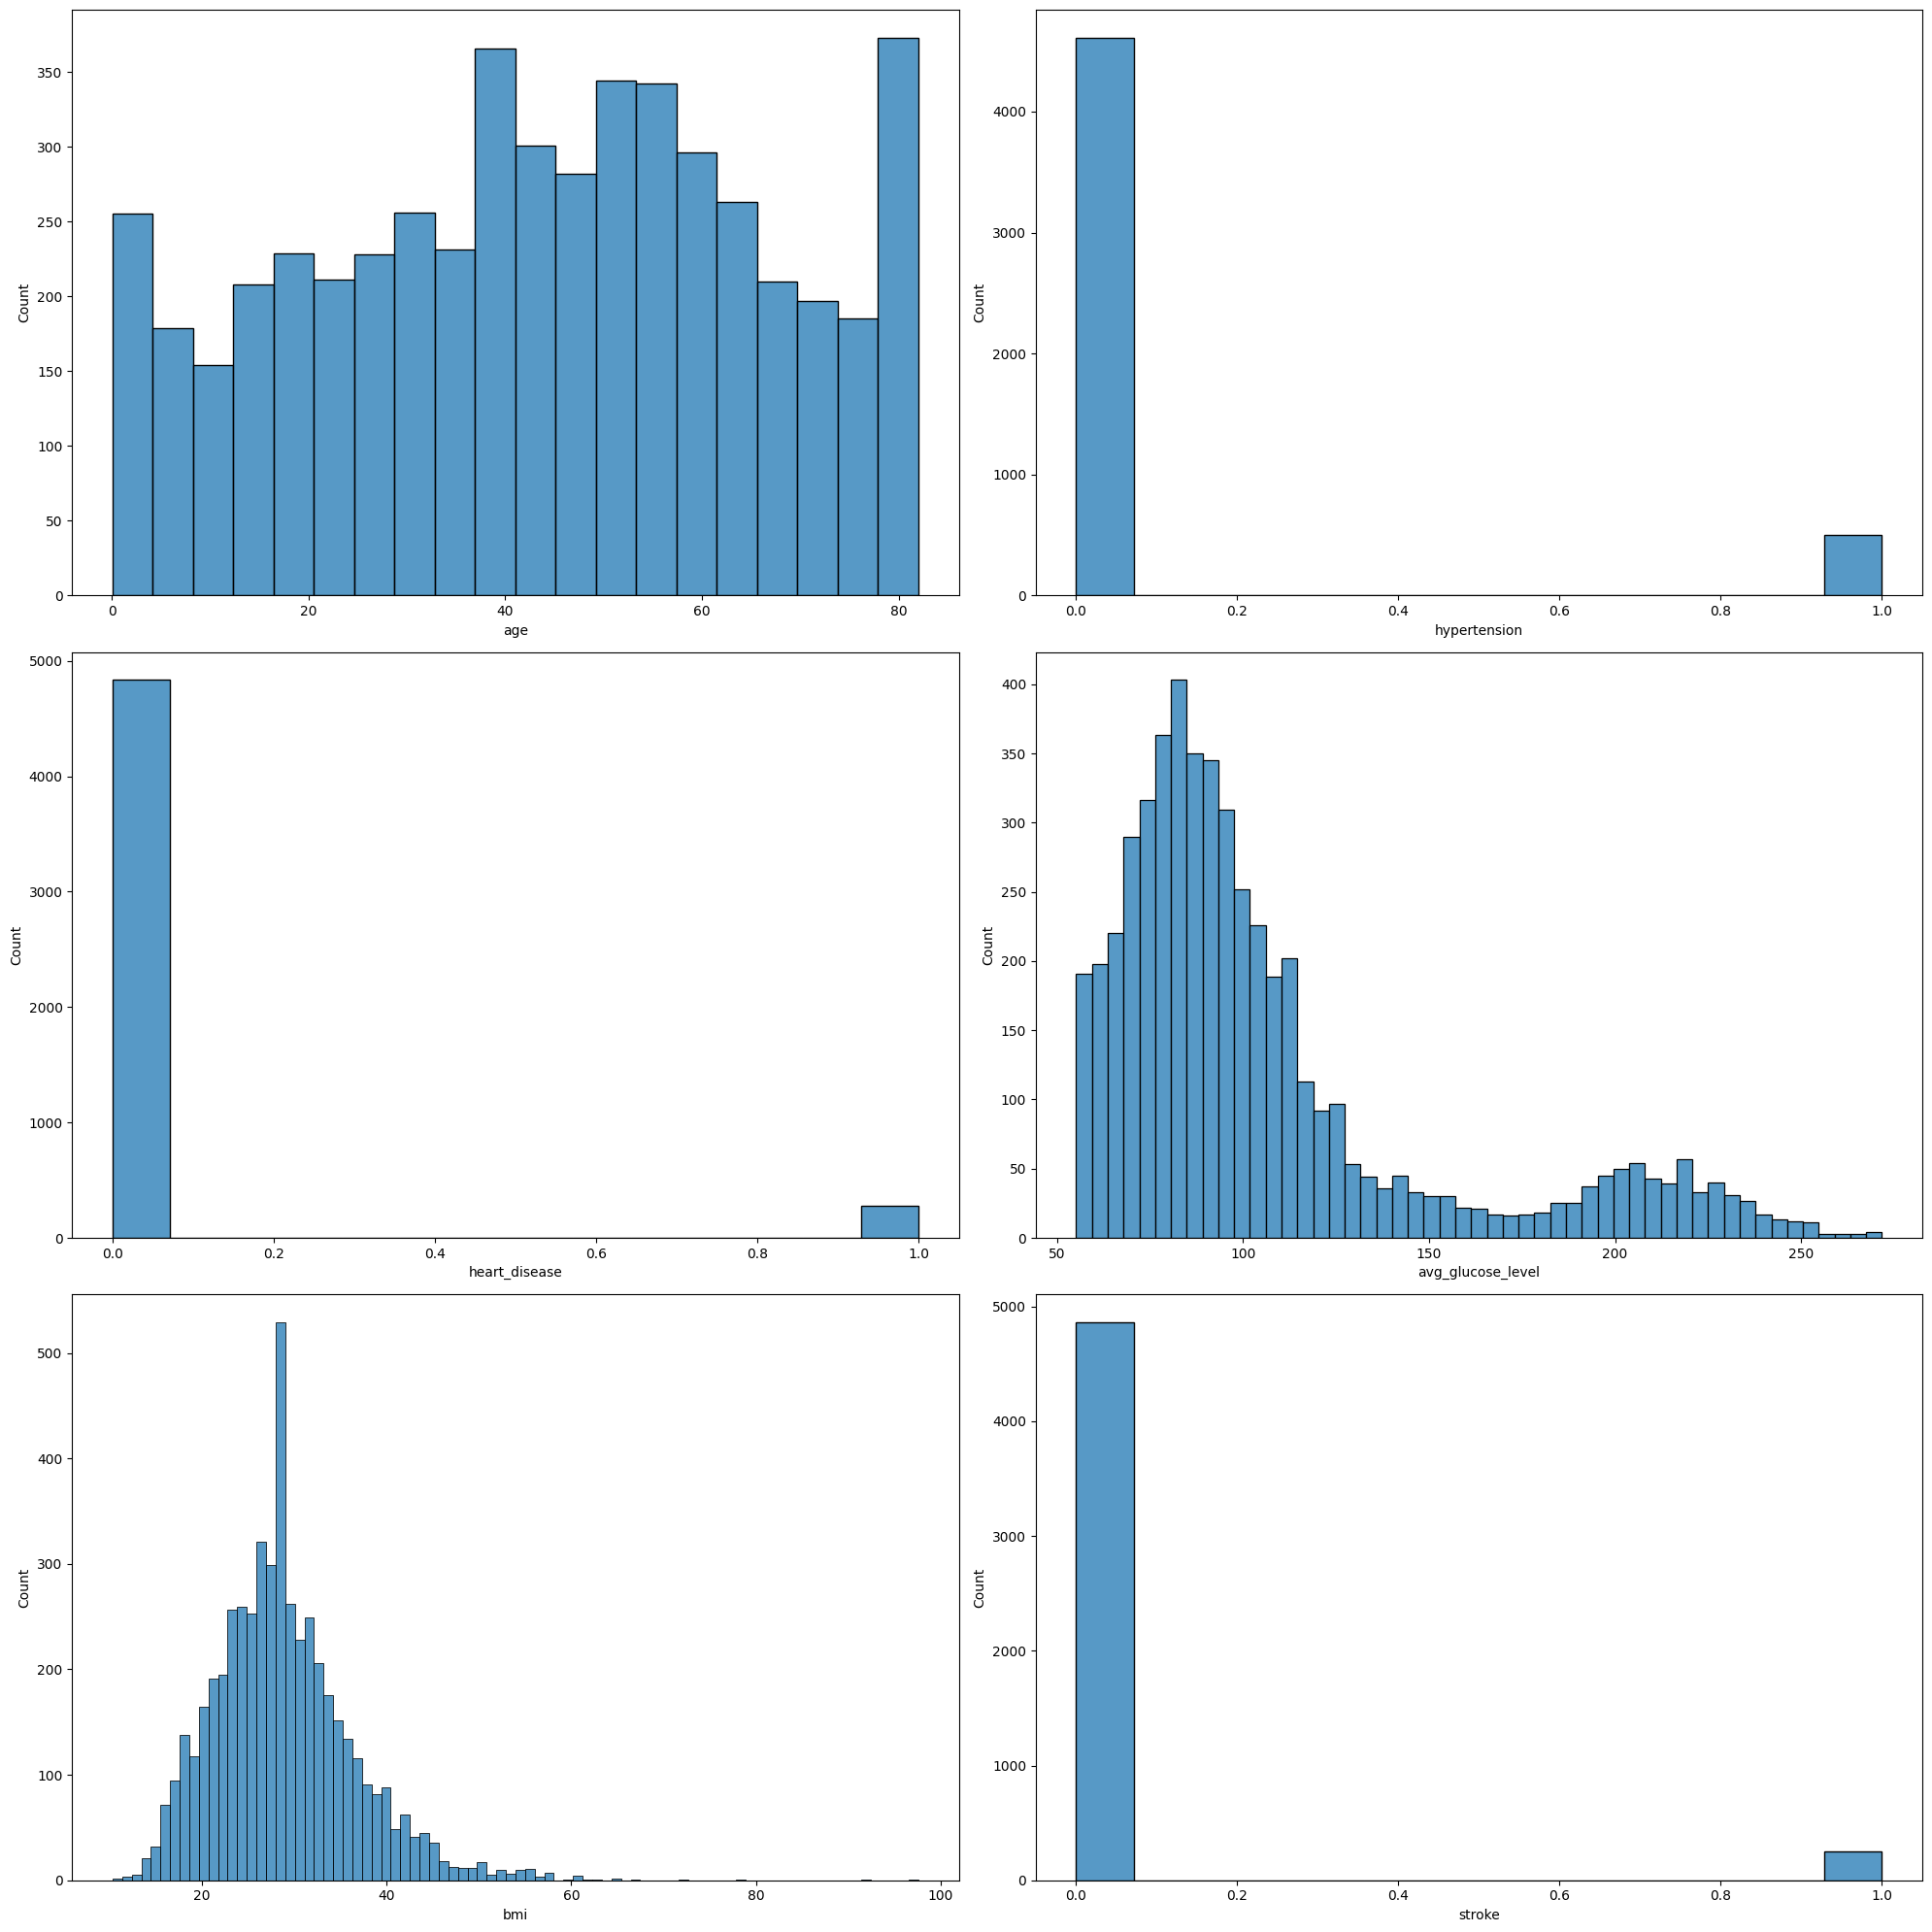

In [389]:
# For numerical columns
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
for x,y in zip(df_healthcare_num.columns,ax.flatten()):
    sns.histplot(x=df_healthcare_num[x],ax=y)
    
plt.tight_layout()
plt.show()

In [390]:
df_healthcare_cat.head(1)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked


In [391]:
for i in df_healthcare_cat.columns:
    #if i not in ['smoking_status','work_type']:
        le = LabelEncoder()
        encoded = le.fit_transform(df_healthcare_cat[i])
        df_healthcare_cat[i] = encoded
df_healthcare_cat.head(1)

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,1,1,1


In [392]:
#df_healthcare_cat['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2},inplace=True)
#df_healthcare_cat['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1},inplace=True)

In [393]:
df_healthcare_new = pd.concat([df_healthcare_num,df_healthcare_cat],axis=1)
df_healthcare_new.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.600000,1,1,1,1,1,1
1,61.0,0,0,202.21,28.893237,1,0,1,2,0,2
2,80.0,0,1,105.92,32.500000,1,1,1,1,0,2
3,49.0,0,0,171.23,34.400000,1,0,1,1,1,3
4,79.0,1,0,174.12,24.000000,1,0,1,2,0,2


In [394]:
# Checking outliers

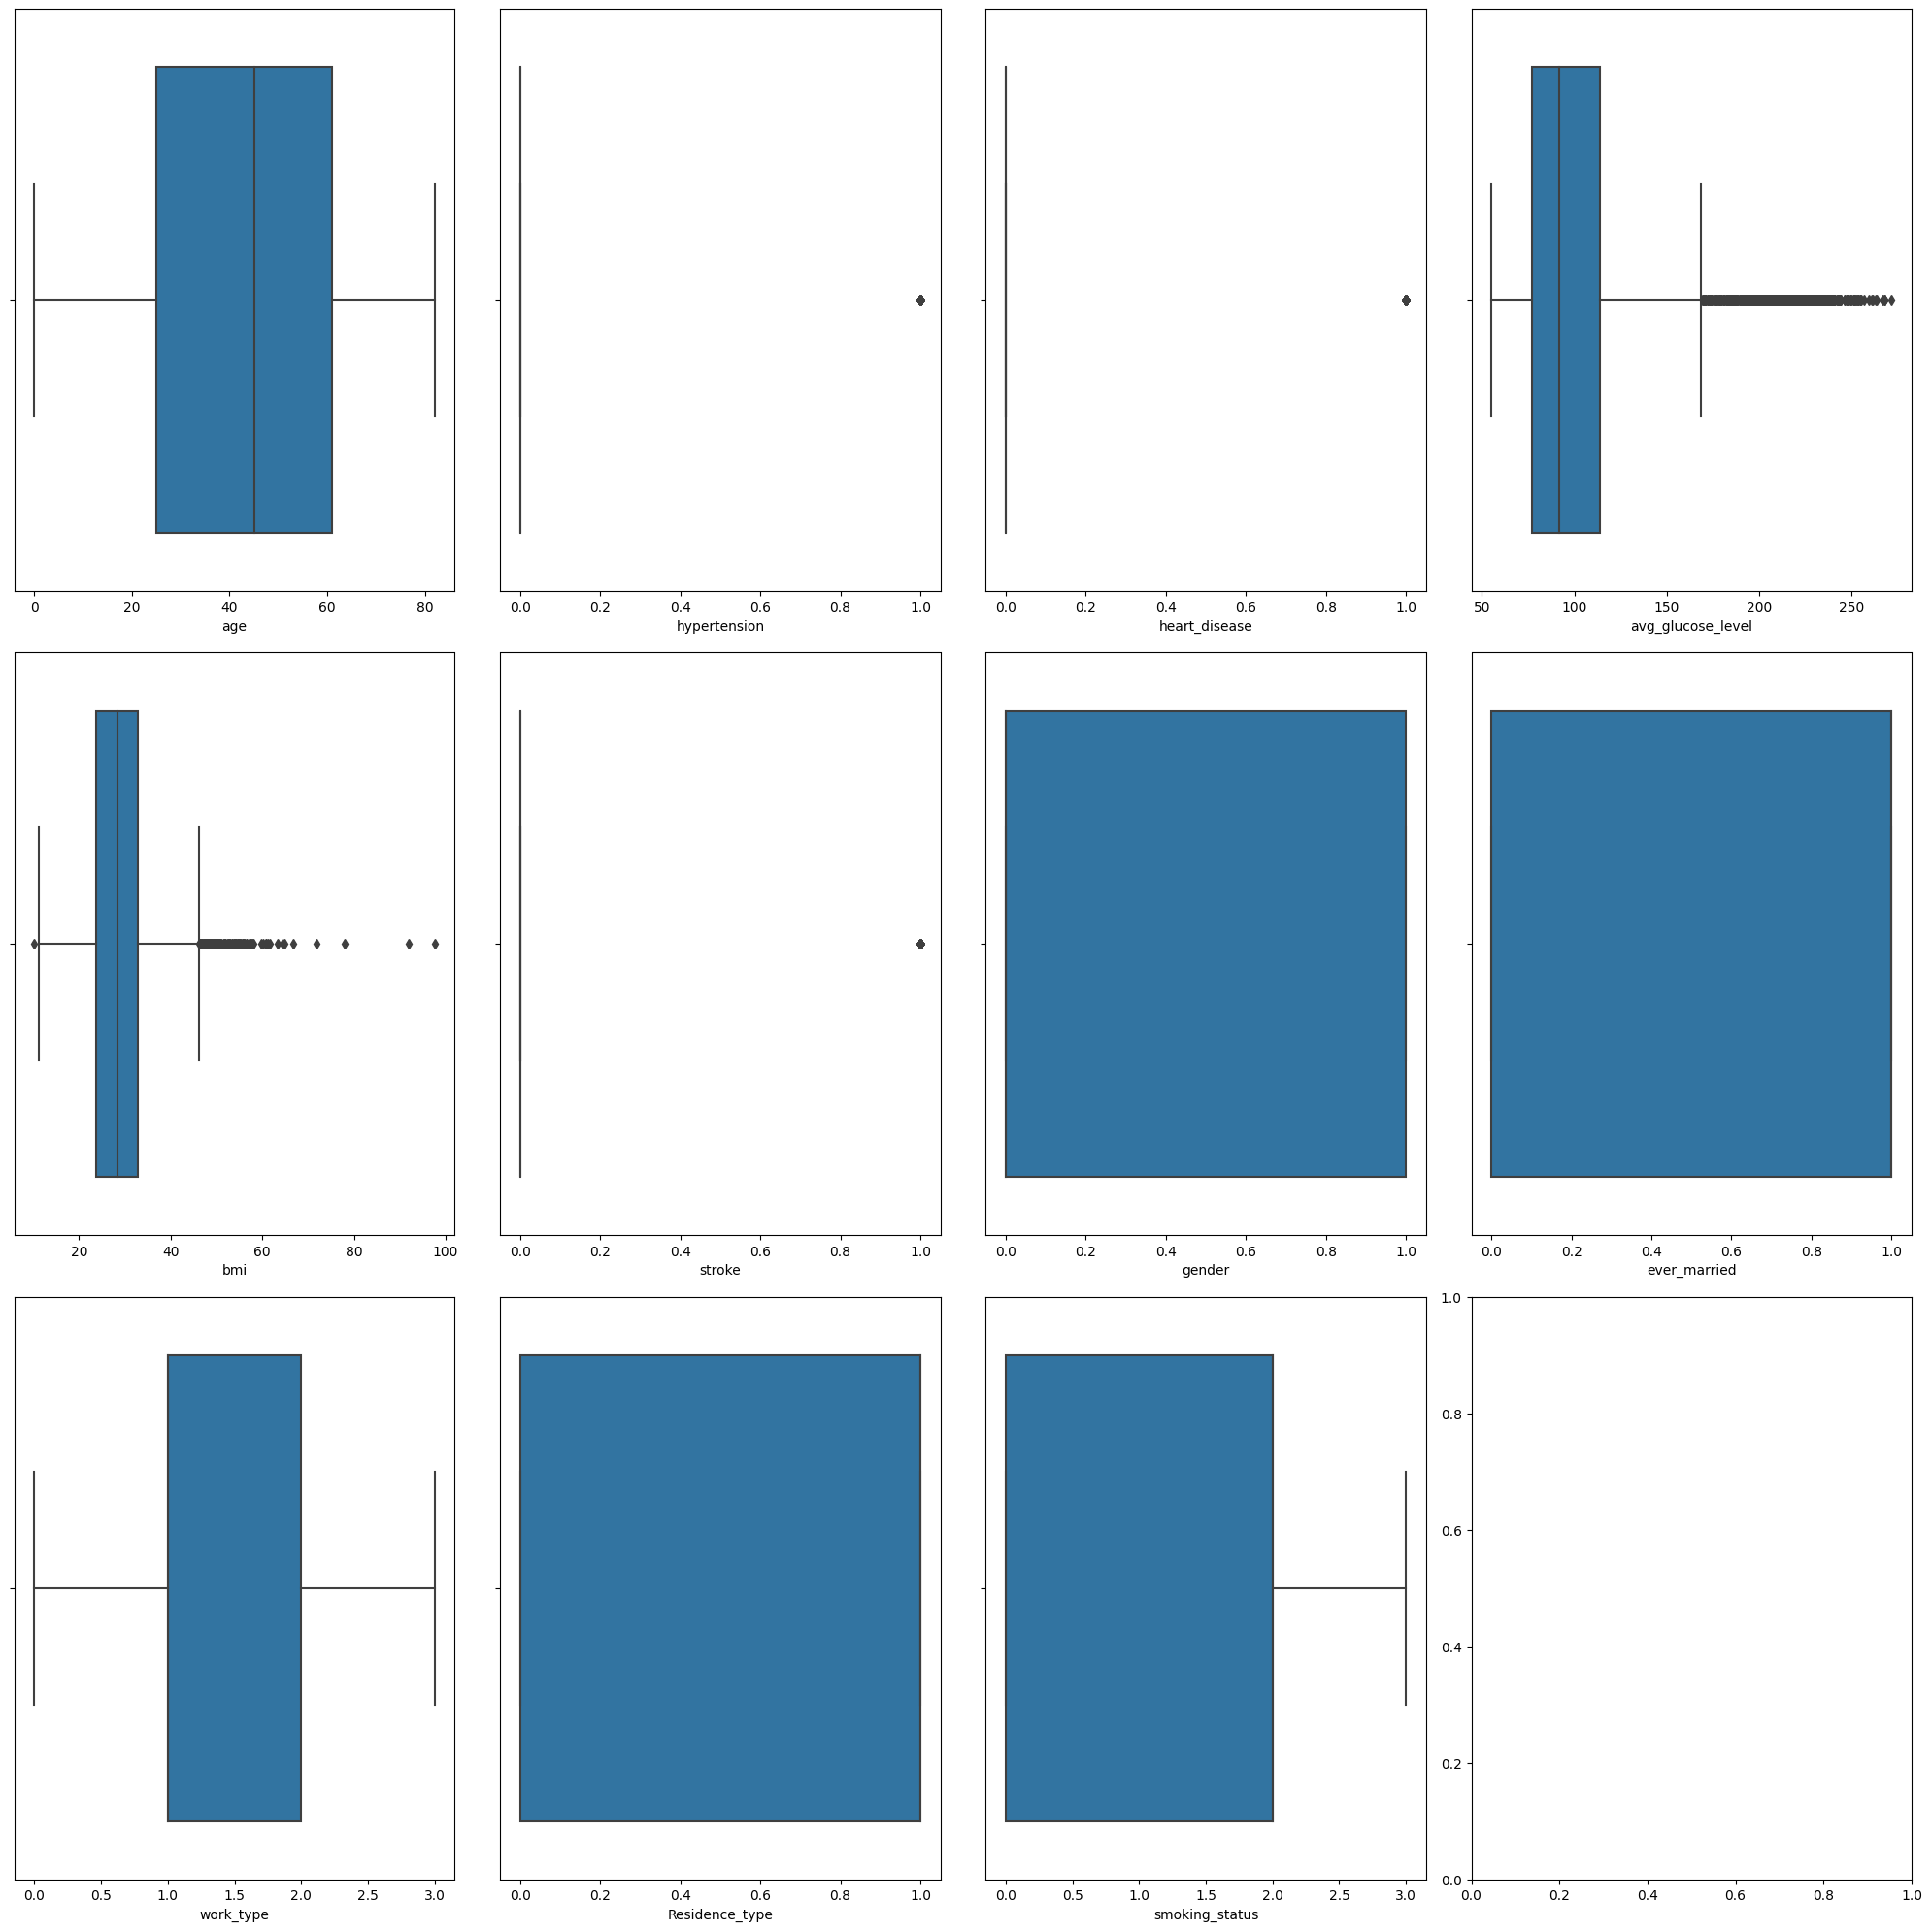

In [395]:
# For numerical columns
fig,ax = plt.subplots(nrows=3,ncols=4,figsize=(20,20))
for x,y in zip(df_healthcare_new.columns,ax.flatten()):
    sns.boxplot(x=df_healthcare_new[x],ax=y)
    
plt.tight_layout()
plt.show()

In [396]:
# we can see that BMI and avg_glucose level has outliers

In [397]:
#df_healthcare_new = df_healthcare_new[~(df_healthcare_new['bmi'] > 60)]

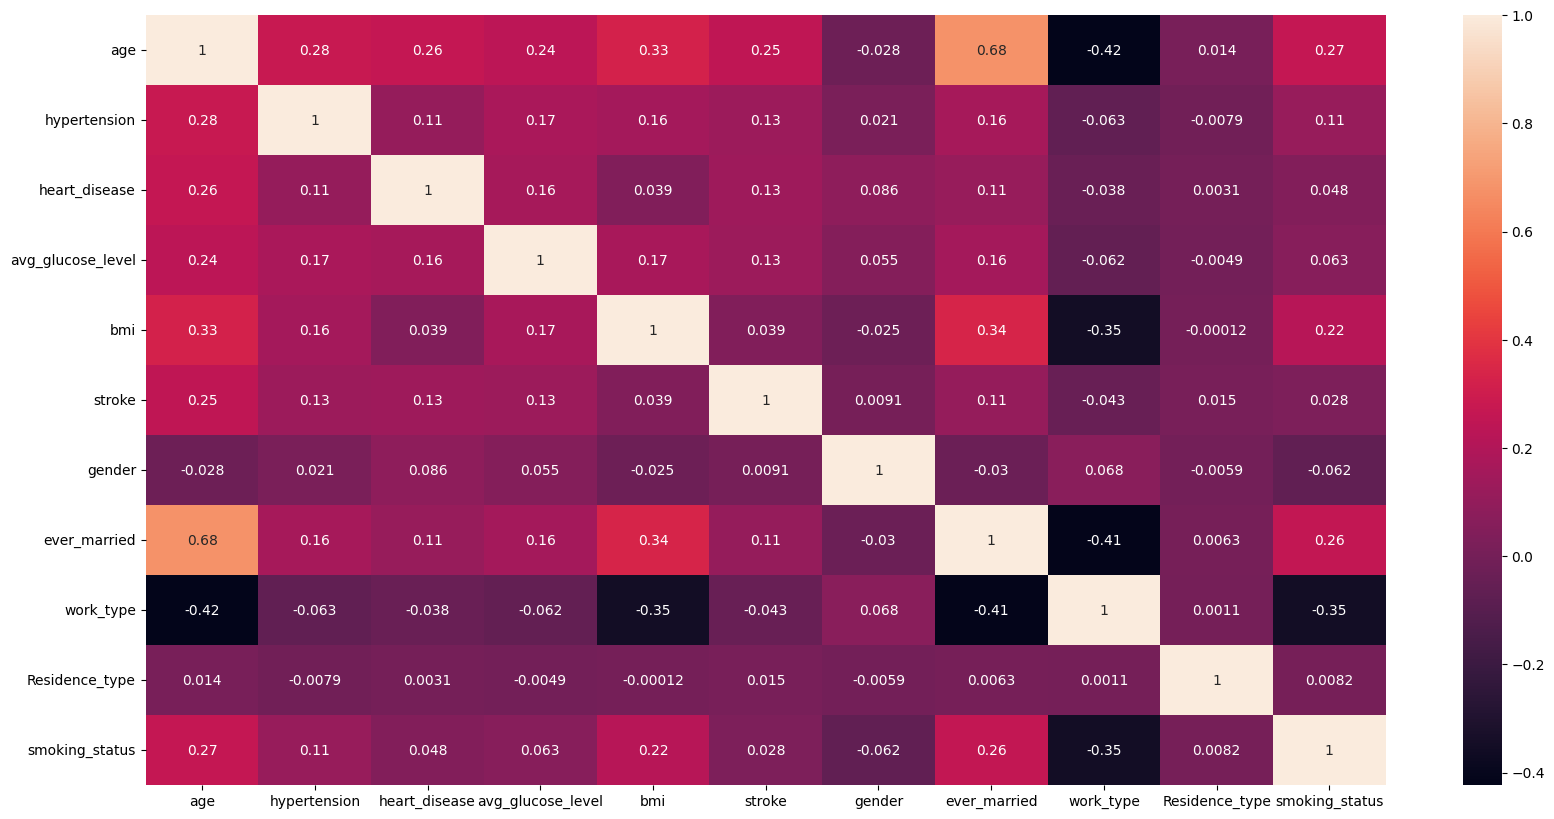

In [398]:
plt.figure(figsize=(20,10))
sns.heatmap(df_healthcare_new.corr(),annot=True)
plt.show()

In [399]:
# The is moderate high correlation between ever_married and age
# The is moderate high correlation between work_type and age
# The is moderate low correlation between ever_married and ever_married

In [400]:
# Removing work_type and work_type since it has high correlation between them. This might impact our further model and analysis.


In [401]:
pd.crosstab(index=df_healthcare_new['stroke'],columns=df_healthcare_new['smoking_status'],
            values=df_healthcare_new['smoking_status'],aggfunc='count')

smoking_status,0,1,2,3
stroke,,,,
0,1497,815,1802,747
1,47,70,90,42


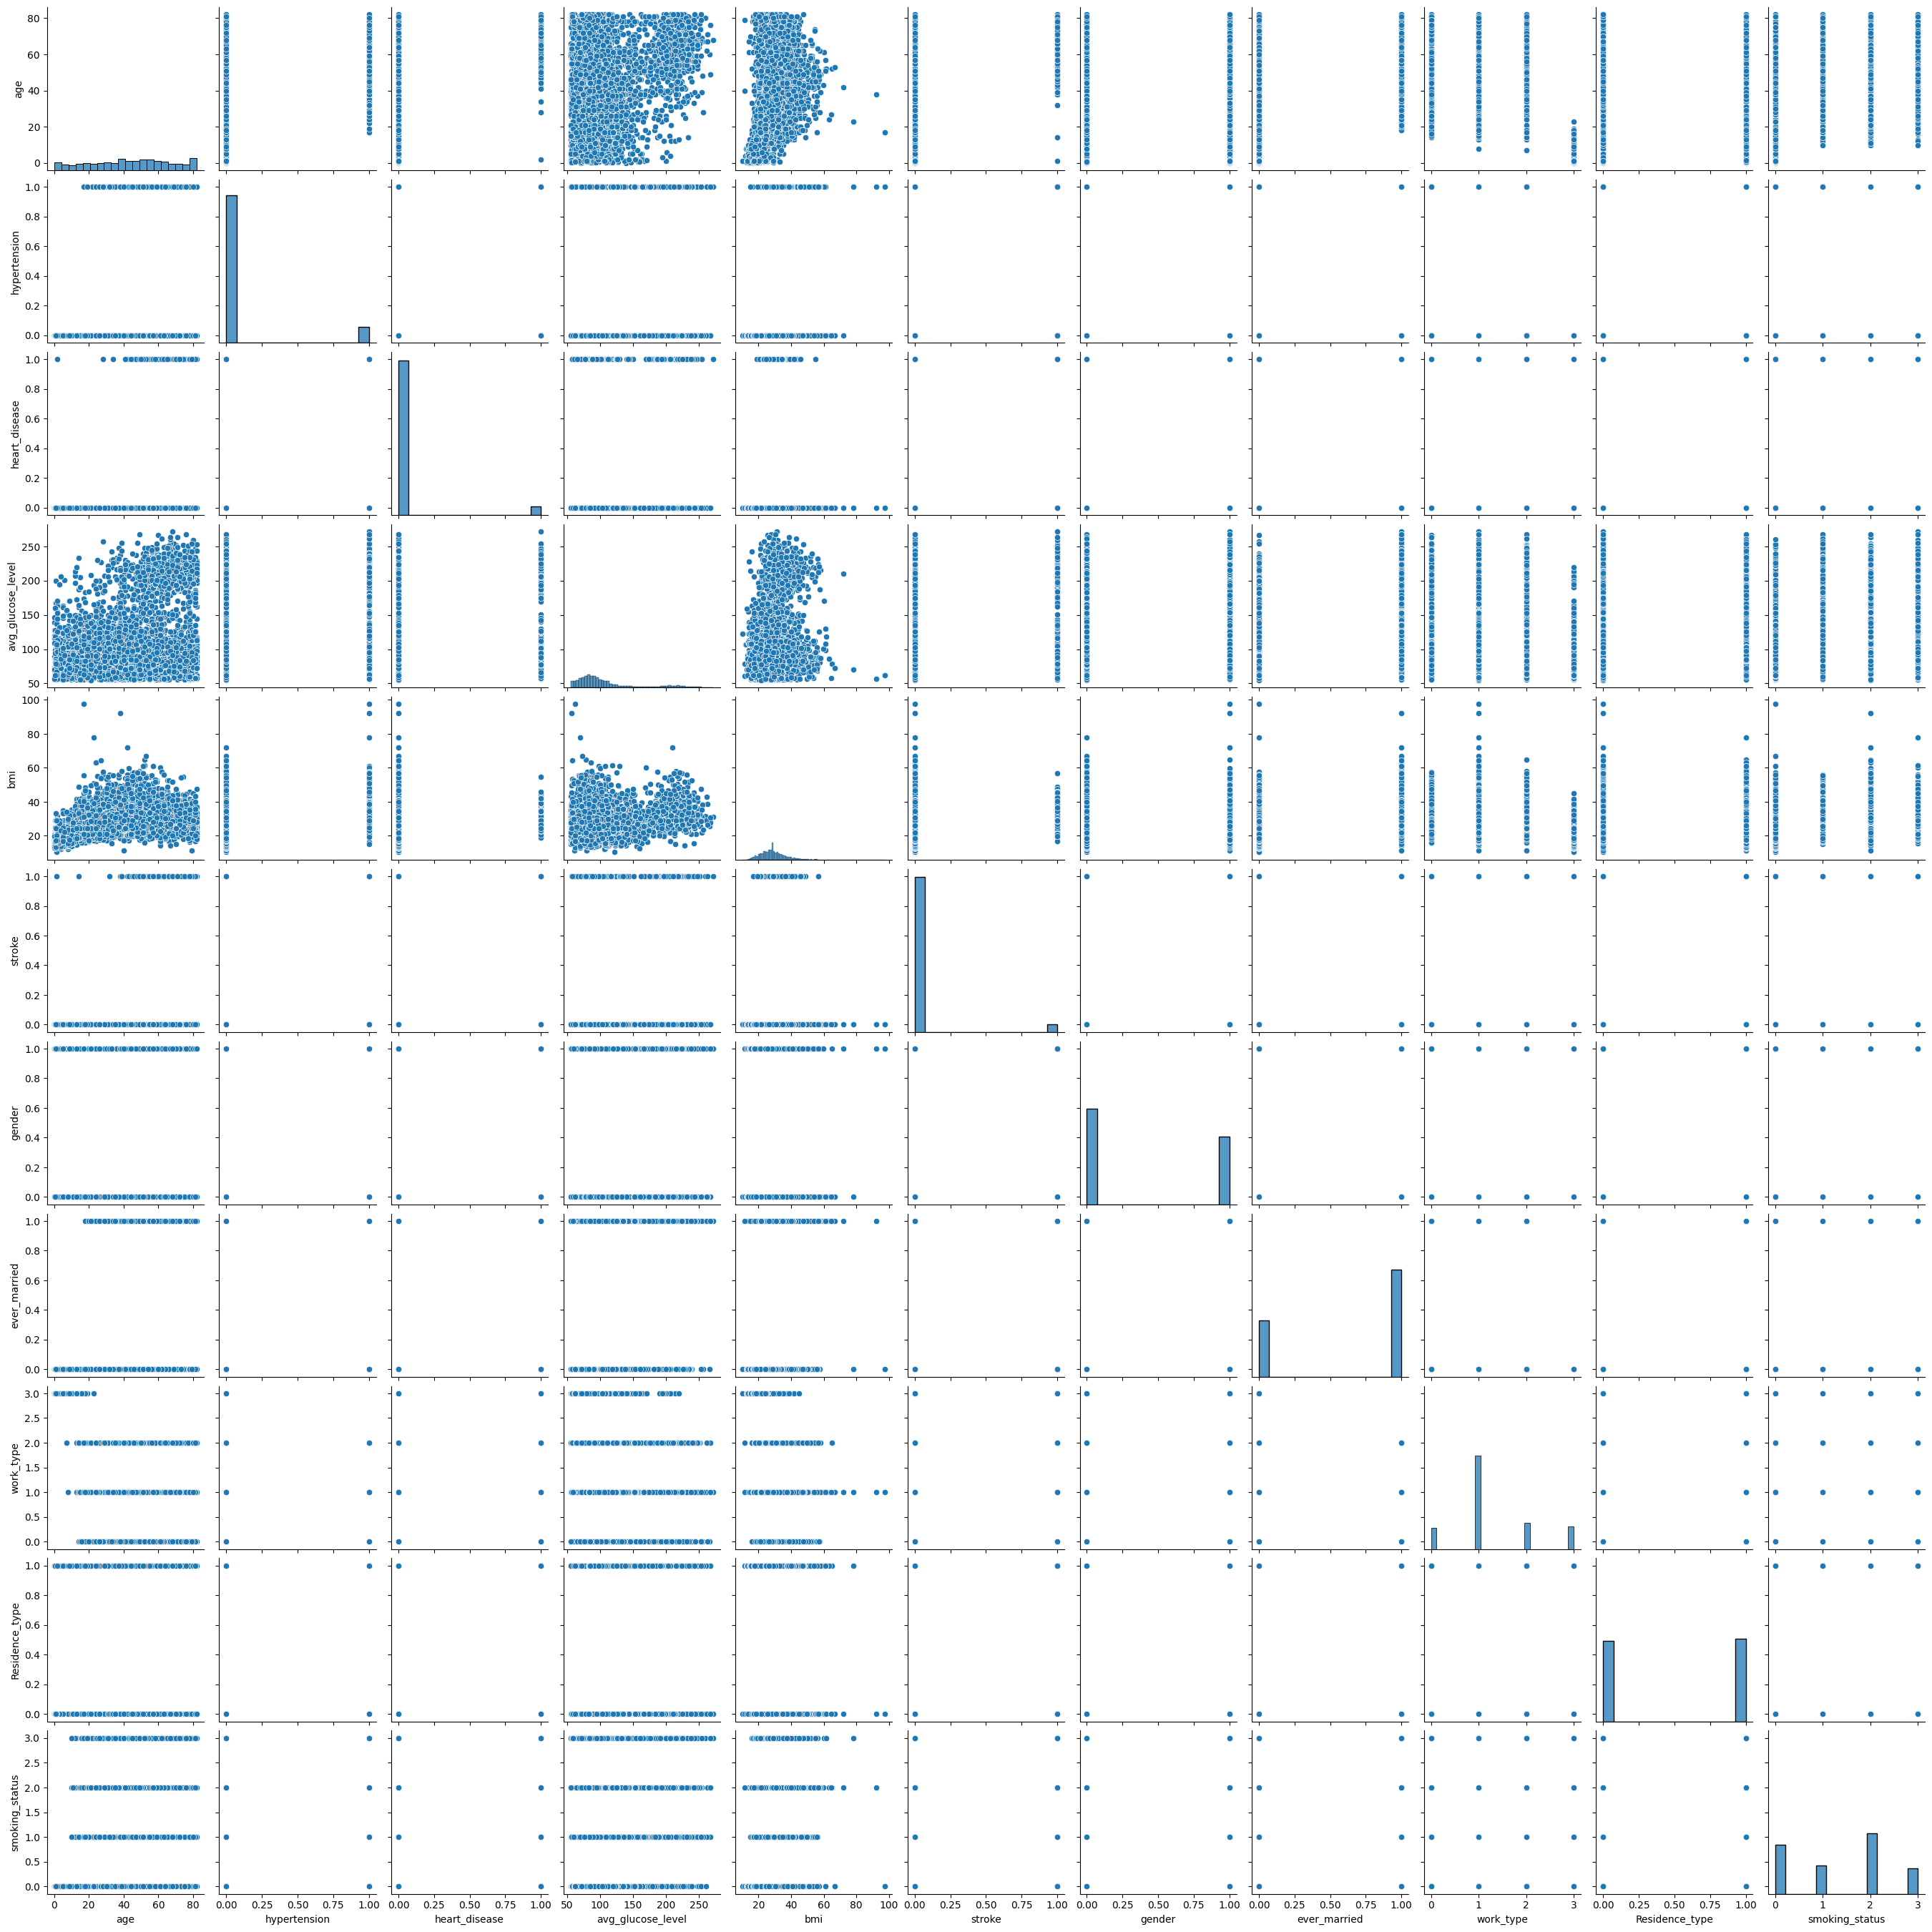

In [402]:
sns.pairplot(df_healthcare_new);

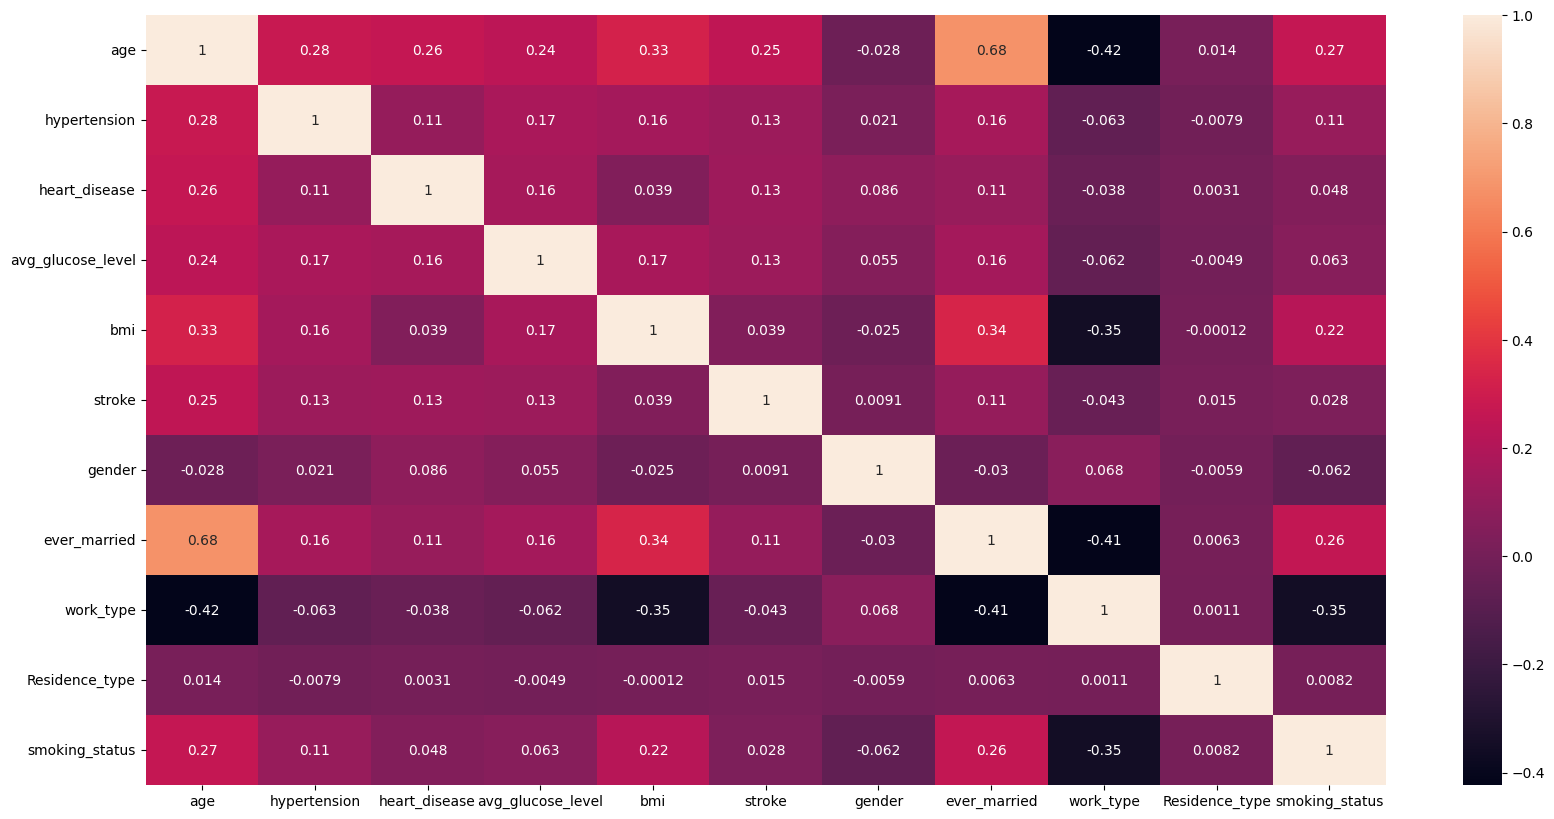

In [403]:
plt.figure(figsize=(20,10))
sns.heatmap(df_healthcare_new.corr(),annot=True)
plt.show()

In [404]:
# spliting variable and target column
X = df_healthcare_new.drop(['stroke'],axis=1)
y = df_healthcare_new['stroke']

In [405]:
# 'Residence_type','bmi','gender','ever_married','work_type

In [406]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X[['age','avg_glucose_level','bmi']])
X_dummy = pd.DataFrame(scaled,columns=['age','avg_glucose_level','bmi'])
X_scaled = pd.concat([X.drop(['age','avg_glucose_level','bmi'],axis=1),X_dummy],axis=1)
X_scaled

,hypertension,heart_disease,gender,ever_married,work_type,Residence_type,smoking_status,age,avg_glucose_level,bmi
0,0,1,1,1,1,1,1,1.051434,2.706375,1.001234e+00
1,0,0,0,1,2,0,2,0.786070,2.121559,4.615554e-16
2,0,1,1,1,1,0,2,1.626390,-0.005028,4.685773e-01
3,0,0,0,1,1,1,3,0.255342,1.437358,7.154182e-01
4,1,0,0,1,2,0,2,1.582163,1.501184,-6.357112e-01
...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,1,1,1,2,1.626390,-0.494658,4.615554e-16
5106,0,0,0,1,2,1,2,1.670617,0.420775,1.442949e+00
5107,0,0,0,1,2,0,2,-0.363842,-0.511443,2.217363e-01
5108,0,0,1,1,1,0,1,0.343796,1.328257,-4.278451e-01


In [407]:
df_healthcare_new2 = pd.concat([X_scaled,y],axis=1)
df_healthcare_new2.head()

,hypertension,heart_disease,gender,ever_married,work_type,Residence_type,smoking_status,age,avg_glucose_level,bmi,stroke
0,0,1,1,1,1,1,1,1.051434,2.706375,1.001234e+00,1
1,0,0,0,1,2,0,2,0.786070,2.121559,4.615554e-16,1
2,0,1,1,1,1,0,2,1.626390,-0.005028,4.685773e-01,1
3,0,0,0,1,1,1,3,0.255342,1.437358,7.154182e-01,1
4,1,0,0,1,2,0,2,1.582163,1.501184,-6.357112e-01,1


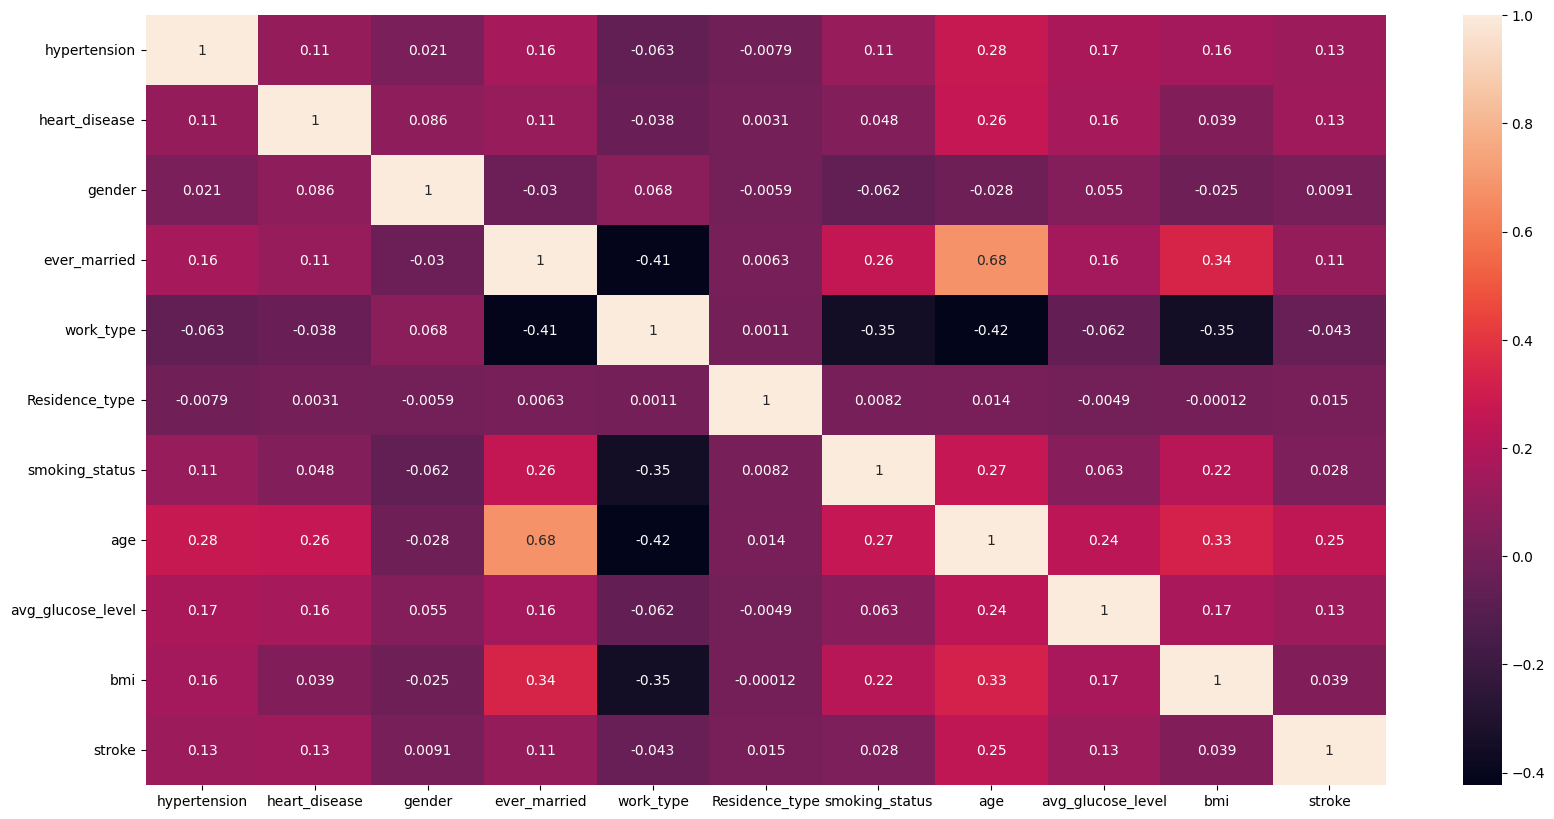

In [408]:
plt.figure(figsize=(20,10))
sns.heatmap(df_healthcare_new2.corr(),annot=True)
plt.show()

In [409]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_healthcare_new2.values,i) for i in range(df_healthcare_new2.shape[1])]
vif['Feature'] = df_healthcare_new2.columns
vif.sort_values(by='VIF',ascending=False)

,VIF,Feature
3,3.837885,ever_married
4,2.880957,work_type
6,2.440654,smoking_status
7,2.169952,age
5,1.885218,Residence_type
2,1.654333,gender
9,1.247328,bmi
0,1.236227,hypertension
1,1.174263,heart_disease
10,1.137876,stroke


In [410]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=10,test_size=0.2,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4088, 10)
(4088,)
(1022, 10)
(1022,)


# Building base model

In [411]:
logit = sm.Logit(y_train,X_train).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.182768
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4088
Model:                          Logit   Df Residuals:                     4078
Method:                           MLE   Df Model:                            9
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                 0.06084
Time:                        18:40:49   Log-Likelihood:                -747.16
converged:                       True   LL-Null:                       -795.55
Covariance Type:            nonrobust   LLR p-value:                 6.981e-17
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
hypertension          0.3233      0.190      1.701      0.089      -0.049       0.696
heart_disease         0.2550      0.231      1.106      0.269      -0.197       0.707
gender               -0.5556      0.146     -3.795      0.000      -0.843      -0.269
ever_married         -1.8433      0.151    -12.219      0.000      -2.139      -1.548
work_type            -0.9293      0.090    -10.317      0.000      -1.106      -0.753
Residence_type       -0.5416      0.135     -4.013      0.000      -0.806      -0.277
smoking_status       -0.5122      0.065     -7.928      0.000      -0.639      -0.386
age                   1.4385      0.105     13.725      0.000       1.233       1.644
avg_glucose_level     0.2127      0.059      3.594      0.000       0.097       0.329
bmi                  -0.0516      0.081     -0.633      0.527      -0.211       0.108
=====================================================================================
"""

In [412]:
logit = sm.Logit(y_train,X_train.drop(['bmi'],axis=1)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.182818
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4088
Model:                          Logit   Df Residuals:                     4079
Method:                           MLE   Df Model:                            8
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                 0.06058
Time:                        18:40:49   Log-Likelihood:                -747.36
converged:                       True   LL-Null:                       -795.55
Covariance Type:            nonrobust   LLR p-value:                 2.329e-17
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
hypertension          0.3150      0.189      1.663      0.096      -0.056       0.686
heart_disease         0.2603      0.230      1.131      0.258      -0.191       0.711
gender               -0.5565      0.146     -3.803      0.000      -0.843      -0.270
ever_married         -1.8525      0.150    -12.353      0.000      -2.146      -1.559
work_type            -0.9259      0.090    -10.269      0.000      -1.103      -0.749
Residence_type       -0.5428      0.135     -4.023      0.000      -0.807      -0.278
smoking_status       -0.5138      0.065     -7.959      0.000      -0.640      -0.387
age                   1.4412      0.105     13.730      0.000       1.235       1.647
avg_glucose_level     0.2058      0.058      3.542      0.000       0.092       0.320
=====================================================================================
"""

In [413]:
logit = sm.Logit(y_train,X_train.drop(['bmi','heart_disease'],axis=1)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.182970
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4088
Model:                          Logit   Df Residuals:                     4080
Method:                           MLE   Df Model:                            7
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                 0.05980
Time:                        18:40:49   Log-Likelihood:                -747.98
converged:                       True   LL-Null:                       -795.55
Covariance Type:            nonrobust   LLR p-value:                 1.080e-17
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
hypertension          0.3288      0.189      1.743      0.081      -0.041       0.699
gender               -0.5400      0.145     -3.716      0.000      -0.825      -0.255
ever_married         -1.8616      0.150    -12.433      0.000      -2.155      -1.568
work_type            -0.9181      0.090    -10.222      0.000      -1.094      -0.742
Residence_type       -0.5445      0.135     -4.036      0.000      -0.809      -0.280
smoking_status       -0.5121      0.065     -7.937      0.000      -0.639      -0.386
age                   1.4634      0.103     14.188      0.000       1.261       1.666
avg_glucose_level     0.2109      0.058      3.641      0.000       0.097       0.324
=====================================================================================
"""

In [414]:
logit = sm.Logit(y_train,X_train.drop(['bmi','heart_disease','hypertension'],axis=1)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.183329
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4088
Model:                          Logit   Df Residuals:                     4081
Method:                           MLE   Df Model:                            6
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                 0.05795
Time:                        18:40:49   Log-Likelihood:                -749.45
converged:                       True   LL-Null:                       -795.55
Covariance Type:            nonrobust   LLR p-value:                 1.052e-17
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender               -0.5395      0.145     -3.714      0.000      -0.824      -0.255
ever_married         -1.8588      0.150    -12.430      0.000      -2.152      -1.566
work_type            -0.9044      0.089    -10.114      0.000      -1.080      -0.729
Residence_type       -0.5443      0.135     -4.036      0.000      -0.809      -0.280
smoking_status       -0.4986      0.064     -7.813      0.000      -0.624      -0.373
age                   1.4910      0.102     14.648      0.000       1.292       1.691
avg_glucose_level     0.2232      0.057      3.884      0.000       0.111       0.336
=====================================================================================
"""

In [415]:
def eval_metric(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred))
    print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred))
    print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred))
    print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred))
    print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred))
    print("Roc_auc_score : ",roc_auc_score(y_test,y_pred))
    print("Confusion Matrix :\n ",confusion_matrix(y_true=y_test,y_pred=y_pred))

In [416]:
log = LogisticRegression(random_state=10)
log.fit(X_train,y_train)
eval_metric(log,X_test,y_test)

Accuracy Score :  0.9510763209393346
Recall Score :  0.0
Precision Score : 0.0
F1 Score :  0.0
Cohen_kappa_score :  0.0
Roc_auc_score :  0.5
Confusion Matrix :
  [[972   0]
 [ 50   0]]


In [417]:
# Buidling Other Model as well and try to compare with base model

In [418]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)
eval_metric(dt,X_test,y_test)

Accuracy Score :  0.8953033268101761
Recall Score :  0.16
Precision Score : 0.1095890410958904
F1 Score :  0.13008130081300812
Cohen_kappa_score :  0.07644882860665847
Roc_auc_score :  0.5465637860082304
Confusion Matrix :
  [[907  65]
 [ 42   8]]


In [419]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train,y_train)
eval_metric(rf,X_test,y_test)

Accuracy Score :  0.9500978473581213
Recall Score :  0.02
Precision Score : 0.3333333333333333
F1 Score :  0.03773584905660377
Cohen_kappa_score :  0.03237663832473159
Roc_auc_score :  0.5089711934156379
Confusion Matrix :
  [[970   2]
 [ 49   1]]


In [420]:
ada = AdaBoostClassifier(random_state=10)
ada.fit(X_train,y_train)
eval_metric(ada,X_test,y_test)

Accuracy Score :  0.9461839530332681
Recall Score :  0.02
Precision Score : 0.14285714285714285
F1 Score :  0.03508771929824562
Cohen_kappa_score :  0.023351982486013223
Roc_auc_score :  0.5069135802469136
Confusion Matrix :
  [[966   6]
 [ 49   1]]


In [421]:
gbb = GradientBoostingClassifier(random_state=10)
gbb.fit(X_train,y_train)
eval_metric(gbb,X_test,y_test)

Accuracy Score :  0.949119373776908
Recall Score :  0.0
Precision Score : 0.0
F1 Score :  0.0
Cohen_kappa_score :  -0.0037775763070413415
Roc_auc_score :  0.49897119341563784
Confusion Matrix :
  [[970   2]
 [ 50   0]]


In [422]:
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train,y_train)
eval_metric(xgb,X_test,y_test)

Accuracy Score :  0.9461839530332681
Recall Score :  0.08
Precision Score : 0.3076923076923077
F1 Score :  0.126984126984127
Cohen_kappa_score :  0.10899407158482066
Roc_auc_score :  0.5353703703703704
Confusion Matrix :
  [[963   9]
 [ 46   4]]


In [423]:
# Since we have huge imbalance in the data due to this our is not able to detect the patient having stroke.
# we need to focus on recall anf f1 score
# We will try to use balance the data.

# Handling Data Imbalance

### Using Near Miss (Under sampling)

In [424]:
nm = NearMiss()
X_nm,y_nm = nm.fit_resample(X_scaled,y)
X_train_nm,X_test_nm,y_train_nm,y_test_nm = train_test_split(X_nm,y_nm,random_state=10,test_size=0.2,stratify=y_nm)
print(X_train_nm.shape)
print(X_test_nm.shape)
print(y_train_nm.shape)
print(y_test_nm.shape)

(398, 10)
(100, 10)
(398,)
(100,)


In [425]:
log_rg = LogisticRegression(random_state=10)
log_rg.fit(X_train_nm,y_train_nm)
eval_metric(log_rg,X_test_nm,y_test_nm)

Accuracy Score :  0.79
Recall Score :  0.7
Precision Score : 0.8536585365853658
F1 Score :  0.7692307692307692
Cohen_kappa_score :  0.5800000000000001
Roc_auc_score :  0.79
Confusion Matrix :
  [[44  6]
 [15 35]]


In [426]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train_nm,y_train_nm)
eval_metric(dt,X_test_nm,y_test_nm)

Accuracy Score :  0.73
Recall Score :  0.68
Precision Score : 0.7555555555555555
F1 Score :  0.7157894736842104
Cohen_kappa_score :  0.45999999999999996
Roc_auc_score :  0.7300000000000001
Confusion Matrix :
  [[39 11]
 [16 34]]


In [427]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_nm,y_train_nm)
eval_metric(rf,X_test_nm,y_test_nm)

Accuracy Score :  0.82
Recall Score :  0.8
Precision Score : 0.8333333333333334
F1 Score :  0.816326530612245
Cohen_kappa_score :  0.64
Roc_auc_score :  0.8200000000000001
Confusion Matrix :
  [[42  8]
 [10 40]]


In [428]:
ada = AdaBoostClassifier(random_state=10)
ada.fit(X_train_nm,y_train_nm)
eval_metric(ada,X_test_nm,y_test_nm)

Accuracy Score :  0.79
Recall Score :  0.78
Precision Score : 0.7959183673469388
F1 Score :  0.7878787878787878
Cohen_kappa_score :  0.5800000000000001
Roc_auc_score :  0.79
Confusion Matrix :
  [[40 10]
 [11 39]]


In [429]:
gb = GradientBoostingClassifier(random_state=10)
gb.fit(X_train_nm,y_train_nm)
eval_metric(gb,X_test_nm,y_test_nm)

Accuracy Score :  0.81
Recall Score :  0.8
Precision Score : 0.8163265306122449
F1 Score :  0.8080808080808082
Cohen_kappa_score :  0.62
Roc_auc_score :  0.81
Confusion Matrix :
  [[41  9]
 [10 40]]


In [430]:
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train_nm,y_train_nm)
eval_metric(xgb,X_test_nm,y_test_nm)

Accuracy Score :  0.79
Recall Score :  0.76
Precision Score : 0.8085106382978723
F1 Score :  0.7835051546391754
Cohen_kappa_score :  0.5800000000000001
Roc_auc_score :  0.79
Confusion Matrix :
  [[41  9]
 [12 38]]


In [431]:
nb = GaussianNB()
nb.fit(X_train_nm,y_train_nm)
eval_metric(nb,X_test_nm,y_test_nm)

Accuracy Score :  0.75
Recall Score :  0.62
Precision Score : 0.8378378378378378
F1 Score :  0.7126436781609196
Cohen_kappa_score :  0.5
Roc_auc_score :  0.7500000000000001
Confusion Matrix :
  [[44  6]
 [19 31]]


In [432]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_nm,y_train_nm)
eval_metric(nb,X_test_nm,y_test_nm)

Accuracy Score :  0.75
Recall Score :  0.62
Precision Score : 0.8378378378378378
F1 Score :  0.7126436781609196
Cohen_kappa_score :  0.5
Roc_auc_score :  0.7500000000000001
Confusion Matrix :
  [[44  6]
 [19 31]]


In [433]:
kf = KFold(n_splits=10,random_state=10,shuffle=True)
score = cross_val_score(RandomForestClassifier(),X_train_nm,y_train_nm,cv=kf)
print('Score:',score)
print('Average Score',np.mean(score))

Score: [0.75       0.825      0.825      0.675      0.825      0.7
 0.9        0.825      0.82051282 0.69230769]
Average Score 0.7837820512820513


In [434]:
kf = KFold(n_splits=10,random_state=10,shuffle=True)
score = cross_val_score(XGBClassifier(),X_train_nm,y_train_nm,cv=kf)
print('Score:',score)
print('Average Score',np.mean(score))

Score: [0.85       0.875      0.8        0.675      0.825      0.6
 0.875      0.9        0.92307692 0.66666667]
Average Score 0.7989743589743591


In [435]:
kf = KFold(n_splits=10,random_state=10,shuffle=True)
score = cross_val_score(AdaBoostClassifier(),X_test_nm,y_test_nm,cv=kf)
print('Score:',score)
print('Average Score',np.mean(score))

Score: [0.6 0.8 0.7 0.8 0.8 0.7 0.7 0.9 0.8 0.7]
Average Score 0.75


In [436]:
# GradientBoosting and RandomForest are performing better in case Undersampling in case of true positive rate

### using SMOTE (Over Sampling)

In [437]:
smt = SMOTE(random_state=10,sampling_strategy='minority')
Oversample_X,Oversample_y = smt.fit_resample(X_scaled,y)

X_train_sm,X_test_sm,y_train_sm,y_test_sm = train_test_split(Oversample_X,Oversample_y,
                                                             random_state=10,test_size=0.2,stratify=Oversample_y)
print(X_train_sm.shape)
print(X_test_sm.shape)
print(y_train_sm.shape)
print(y_test_sm.shape)

(7777, 10)
(1945, 10)
(7777,)
(1945,)


In [438]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train_sm,y_train_sm)
eval_metric(dt,X_test_sm,y_test_sm)

Accuracy Score :  0.9115681233933162
Recall Score :  0.920863309352518
Precision Score : 0.9041372351160444
F1 Score :  0.9124236252545824
Cohen_kappa_score :  0.8231345169479787
Roc_auc_score :  0.9115633419190574
Confusion Matrix :
  [[877  95]
 [ 77 896]]


In [439]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_sm,y_train_sm)
eval_metric(rf,X_test_sm,y_test_sm)

Accuracy Score :  0.9326478149100257
Recall Score :  0.9681397738951696
Precision Score : 0.9040307101727447
F1 Score :  0.9349875930521092
Cohen_kappa_score :  0.8652906801843883
Roc_auc_score :  0.9326295577294778
Confusion Matrix :
  [[872 100]
 [ 31 942]]


In [440]:
ada = AdaBoostClassifier(random_state=10)
ada.fit(X_train_sm,y_train_sm)
eval_metric(ada,X_test_sm,y_test_sm)

Accuracy Score :  0.8174807197943444
Recall Score :  0.8776978417266187
Precision Score : 0.7834862385321101
F1 Score :  0.8279205041202132
Cohen_kappa_score :  0.6349387621305967
Roc_auc_score :  0.8174497439085768
Confusion Matrix :
  [[736 236]
 [119 854]]


In [441]:
gbb = GradientBoostingClassifier(random_state=10)
gbb.fit(X_train_sm,y_train_sm)
eval_metric(gbb,X_test_sm,y_test_sm)

Accuracy Score :  0.8524421593830335
Recall Score :  0.8992805755395683
Precision Score : 0.8223684210526315
F1 Score :  0.8591065292096219
Cohen_kappa_score :  0.7048700421534919
Roc_auc_score :  0.8524180655475619
Confusion Matrix :
  [[783 189]
 [ 98 875]]


In [442]:
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train_sm,y_train_sm)
eval_metric(xgb,X_test_sm,y_test_sm)

Accuracy Score :  0.9511568123393316
Recall Score :  0.9537512846865365
Precision Score : 0.9488752556237219
F1 Score :  0.9513070220399794
Cohen_kappa_score :  0.9023133406326278
Roc_auc_score :  0.9511554777342148
Confusion Matrix :
  [[922  50]
 [ 45 928]]


In [443]:
gnb = GaussianNB()
gnb.fit(X_train_sm,y_train_sm)
eval_metric(gb,X_test_sm,y_test_sm)

Accuracy Score :  0.4879177377892031
Recall Score :  0.736896197327852
Precision Score : 0.4921070693205216
F1 Score :  0.5901234567901235
Cohen_kappa_score :  -0.02442692546064884
Roc_auc_score :  0.48778966244993427
Confusion Matrix :
  [[232 740]
 [256 717]]


In [444]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm,y_train_sm)
eval_metric(knn,X_test_sm,y_test_sm)

Accuracy Score :  0.8740359897172236
Recall Score :  0.9784172661870504
Precision Score : 0.8095238095238095
F1 Score :  0.8859934853420196
Cohen_kappa_score :  0.7480448726252559
Roc_auc_score :  0.8739822956449655
Confusion Matrix :
  [[748 224]
 [ 21 952]]


In [445]:
# We can see that XGB boast is performing much better than other model in term roc_auc score but the other metrics also
# look good with 95% score.

# But KNN is performing best in determining the True Positive case.
# Let try to tune the parameter and see we can futher improve the model performance

# Feature Selection

In [446]:
def cross_validate(model,n):
    global X_train_sm,y_train_sm
    rfe_rf = RFE(estimator=model,n_features_to_select=n,importance_getter='auto')
    rfe_rf.fit(X_train_sm,y_train_sm)

    feat_index = pd.Series(rfe_rf.ranking_,index=X_train_sm.columns)
    signi_feat = feat_index[feat_index==1].index
    X_train_signi = X_train_sm[signi_feat]
    kf =KFold(n_splits=5)
    scores_val_score = cross_val_score(estimator=model,
                                   X=X_train_signi,y=y_train_sm,scoring='roc_auc')
    return np.average(scores_val_score),signi_feat

In [447]:
list1 = []
for i in range(1,X_train_sm.shape[1]+1):
    list1.append(cross_validate(XGBClassifier(random_state=10),i))
list1

[(0.9780218955387966, Index(['age'], dtype='object')),
 (0.9786010754605663, Index(['heart_disease', 'age'], dtype='object')),
 (0.9814303641350118,
  Index(['heart_disease', 'work_type', 'age'], dtype='object')),
 (0.9821058984132847,
  Index(['heart_disease', 'ever_married', 'work_type', 'age'], dtype='object')),
 (0.983011556858379,
  Index(['heart_disease', 'gender', 'ever_married', 'work_type', 'age'], dtype='object')),
 (0.9854111877299341,
  Index(['heart_disease', 'gender', 'ever_married', 'work_type',
         'smoking_status', 'age'],
        dtype='object')),
 (0.9880936646504545,
  Index(['heart_disease', 'gender', 'ever_married', 'work_type',
         'smoking_status', 'age', 'bmi'],
        dtype='object')),
 (0.9881844889864265,
  Index(['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type',
         'smoking_status', 'age', 'bmi'],
        dtype='object')),
 (0.990104379520257,
  Index(['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_ty

In [450]:
Oversample_X_singi = Oversample_X[['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type',
         'smoking_status', 'age', 'avg_glucose_level', 'bmi']]
X_train_sm_signi,X_test_sm_signi,y_train_sm_signi,y_test_sm_signi = train_test_split(Oversample_X_singi,Oversample_y,
                                                             random_state=10,test_size=0.2,stratify=Oversample_y)
print(X_train_sm_signi.shape)
print(X_test_sm_signi.shape)
print(y_train_sm_signi.shape)
print(y_test_sm_signi.shape)

xgb = XGBClassifier(random_state=10)
xgb.fit(X_train_sm_signi,y_train_sm_signi)
eval_metric(xgb,X_test_sm_signi,y_test_sm_signi)

(7777, 9)
(1945, 9)
(7777,)
(1945,)
Accuracy Score :  0.9552699228791773
Recall Score :  0.9537512846865365
Precision Score : 0.9567010309278351
F1 Score :  0.955223880597015
Cohen_kappa_score :  0.9105399639971135
Roc_auc_score :  0.9552707040716634
Confusion Matrix :
  [[930  42]
 [ 45 928]]


# Hyperparameter Tuning

In [ ]:
#Best Param for XGBBoost  {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 300}
#Best Score for XGBBoost  0.9920145907485793

In [451]:
param_list = [{'n_estimators':[100,150,200,300],
              'max_depth':[None,10,20,50],
              'learning_rate':[None,0.01,0.1,0.5],
              'gamma':[0,0.1,0.5,1]}]

xgb =  XGBClassifier(random_state=10)
kf = KFold(n_splits=5)
grid = GridSearchCV(estimator=xgb,param_grid=param_list,scoring='roc_auc',cv=kf,verbose=2)
grid.fit(X_train_sm,y_train_sm)
print('Best Param for XGBBoost ',grid.best_params_)
print('Best Score for XGBBoost ',grid.best_score_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0, learning

[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.3s
[CV

[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=200; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=200; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=200; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=200; total time=   0.6s
[CV] END gamma=0, learning_rate=

[CV] END gamma=0, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.7s
[CV] END gamma=0, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.7s
[CV] END gamma=0, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.7s
[CV] END gamma=0, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.7s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=150; total time=   0.5s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=150; total time=   0.5s
[CV] END gamma=0, learning_rate=

[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.6s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.6s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=200; total time=   0.8s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=200; total time=   0.9s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=200; total time=   0.9s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=200; total time=   0.9s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=200; total time=   0.9s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=300; total time=   1.3s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=300; total time=   1.4s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=300; total time=   1.3s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=300; total time=   1.4s

[CV] END gamma=0.1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.7s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.7s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.6s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.6s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=150; total time=   0.9s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=150; total time=   0.9s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=150; total time=   0.9s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=150; total time=   0.8s

[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=150; total time=   0.9s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.1s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.1s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.1s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.1s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.1s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.6s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.6s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.6s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.7s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.5s
[CV] END g

[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=2

[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=10, n_estimators=100

[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=200; total time=   0.6s
[CV] END g

[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=200; total time=   0.5s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=200; total time=   0.6s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=200; total time=   0.5s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=200; total time=   0.5s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.8s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.8s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.9s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.8s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.8s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.4s
[CV] END g

[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=100; total time=   0.5s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=100; total time=   0.5s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.8s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.6s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.8s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.8s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.7s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=200; total time=   1.1s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=200; total time=   0.9s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=200; total time=   1.1s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=200; total time=   1.1s
[CV] END gamma=1, lea

[CV] END gamma=1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=50, n_estimators=150; total time=   0.9s
[CV] END gamma=1, lea

[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=150; total time=   0.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=150; total time=   1.0s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.2s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.7s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.8s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.9s
[CV] END gamma=1, learning_rate=

In [452]:
xgb_boost_tuned = XGBClassifier(n_estimators=grid.best_params_['n_estimators'],
                                learning_rate=grid.best_params_['learning_rate'],
                                  max_depth=grid.best_params_['max_depth'],
                                gamma = grid.best_params_['gamma'],
                                random_state=10)

xgb_boost_tuned.fit(X_train_sm,y_train_sm)
y_pred_tuned = xgb_boost_tuned.predict(X_test_sm)
confusion_matrix(y_true=y_test_sm,y_pred=y_pred_tuned)

array([[923,  49],
       [ 42, 931]], dtype=int64)

In [453]:
kf = KFold(n_splits=10)
score = cross_val_score(XGBClassifier(n_estimators=grid.best_params_['n_estimators'],
                                learning_rate=grid.best_params_['learning_rate'],
                                  max_depth=grid.best_params_['max_depth'],
                                gamma = grid.best_params_['gamma'],
                                random_state=10),X_train_sm,y_train_sm,cv=kf,scoring='roc_auc')
print('Score:',score)
print('Average Score',np.mean(score))

Score: [0.99181433 0.99309397 0.99307318 0.99631984 0.99187798 0.99480561
 0.99265056 0.99499176 0.99280964 0.99204719]
Average Score 0.9933484063735627


In [454]:
kf = KFold(n_splits=10)
score = cross_val_score(XGBClassifier(n_estimators=grid.best_params_['n_estimators'],
                                learning_rate=grid.best_params_['learning_rate'],
                                  max_depth=grid.best_params_['max_depth'],
                                gamma = grid.best_params_['gamma'],
                                random_state=10),X_test_sm,y_test_sm,cv=kf,scoring='roc_auc')
print('Score:',score)
print('Average Score',np.mean(score))

Score: [0.95881226 0.94631579 0.93400801 0.96766379 0.94331551 0.9500692
 0.97553419 0.94398384 0.95901203 0.94819212]
Average Score 0.9526906740654079


In [455]:
eval_metric(xgb,X_test_sm_,y_test_sm)

Accuracy Score :  0.9532133676092545
Recall Score :  0.9568345323741008
Precision Score : 0.95
F1 Score :  0.953405017921147
Cohen_kappa_score :  0.9064263641914772
Roc_auc_score :  0.9532115048701779


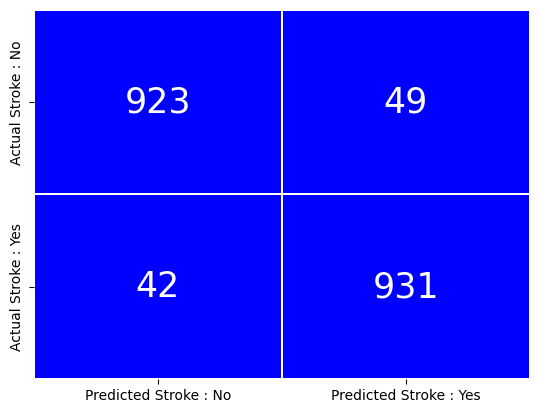

In [456]:
# type your code here

cm =confusion_matrix(y_true=y_test_sm,y_pred=y_pred_tuned)

conf_matrix_xgb = pd.DataFrame(data=cm,columns=['Predicted Stroke : No','Predicted Stroke : Yes'],
                             index=['Actual Stroke : No','Actual Stroke : Yes'])
sns.heatmap(data=conf_matrix_xgb,annot=True,fmt='d',cmap=ListedColormap(['blue']),linewidths=0.2,cbar=False,
            annot_kws={'size':25})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
#Best Param for Random Forest  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 40, 'n_estimators': 150}
# Best Score for Random Forest  0.8564412234454627

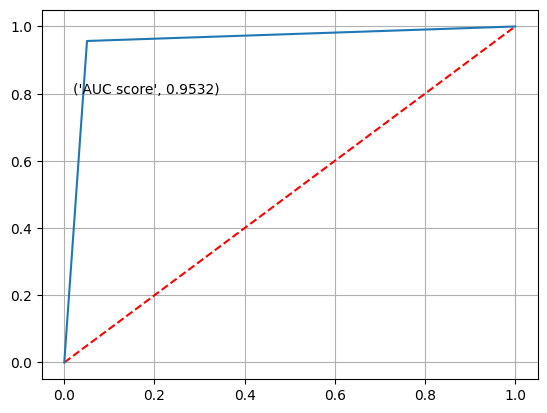

In [457]:
fpr,tpr,thresholds = roc_curve(y_test_sm,y_pred_tuned)

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)

plt.text(x=0.02,y=0.8,s=('AUC score',round(roc_auc_score(y_test_sm,y_pred_tuned),4)))

plt.grid(True)
plt.show()

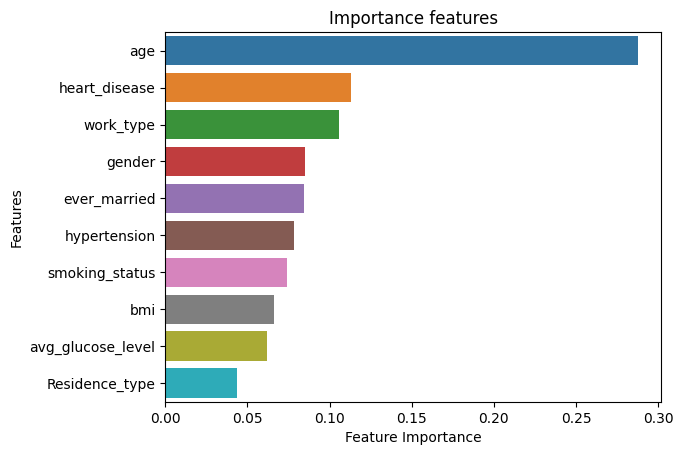

In [458]:
df_feature_importance = pd.DataFrame({'Features':X_train_sm.columns,
                                      'Feature Importance':xgb_boost_tuned.feature_importances_})
df_feature_importance = df_feature_importance.sort_values(by='Feature Importance',ascending=False)
sns.barplot(data=df_feature_importance,x='Feature Importance',y='Features')
plt.title('Importance features')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()